In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./dataset/credit-a.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [14]:
x = data.iloc[:,:-1]
# 把-1改成0
y = data.iloc[:,-1].replace(-1, 0)

In [15]:
y.value_counts()

1    357
0    296
Name: 15, dtype: int64

In [28]:
# 创建顺序模型
# model = tf.keras.Sequential([
#     # 第1个隐藏层
#     tf.keras.layers.Dense(4, input_shape=(15,), activation="relu"),
#     # 第2个隐藏层
#     tf.keras.layers.Dense(4, activation="relu"),
#     # 输出层 激活函数改用 sigmoid ???
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(15,), activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
# 输出层 激活函数改用 sigmoid ???
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 64        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(
    optimizer="adam",
    # 二元交叉熵
    loss="binary_crossentropy",
    # 记录训练过程中的相关值，如准确率，损失值
    metrics=['acc']
)

In [31]:
history = model.fit(x, y, epochs=100)

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 0s 109us/sample - loss: 0.6800 - acc: 0.5727
Epoch 2/100
653/653 [==============================] - 0s 31us/sample - loss: 0.6476 - acc: 0.6524
Epoch 3/100
653/653 [==============================] - 0s 28us/sample - loss: 0.6262 - acc: 0.6508
Epoch 4/100
653/653 [==============================] - 0s 26us/sample - loss: 0.6197 - acc: 0.6493
Epoch 5/100
653/653 [==============================] - 0s 27us/sample - loss: 0.6164 - acc: 0.6493
Epoch 6/100
653/653 [==============================] - 0s 27us/sample - loss: 0.6123 - acc: 0.6554
Epoch 7/100
653/653 [==============================] - 0s 24us/sample - loss: 0.6105 - acc: 0.6539
Epoch 8/100
653/653 [==============================] - 0s 24us/sample - loss: 0.6089 - acc: 0.6570
Epoch 9/100
653/653 [==============================] - 0s 24us/sample - loss: 0.6040 - acc: 0.6631
Epoch 10/100
653/653 [==============================] - 0s 26us/sample - loss: 0.6020 -

653/653 [==============================] - 0s 26us/sample - loss: 0.4908 - acc: 0.7580
Epoch 82/100
653/653 [==============================] - 0s 24us/sample - loss: 0.4853 - acc: 0.7642
Epoch 83/100
653/653 [==============================] - 0s 34us/sample - loss: 0.4896 - acc: 0.7580
Epoch 84/100
653/653 [==============================] - 0s 24us/sample - loss: 0.4888 - acc: 0.7672
Epoch 85/100
653/653 [==============================] - 0s 26us/sample - loss: 0.4952 - acc: 0.7672
Epoch 86/100
653/653 [==============================] - 0s 27us/sample - loss: 0.4869 - acc: 0.7672
Epoch 87/100
653/653 [==============================] - 0s 23us/sample - loss: 0.4817 - acc: 0.7672
Epoch 88/100
653/653 [==============================] - 0s 23us/sample - loss: 0.4812 - acc: 0.7688
Epoch 89/100
653/653 [==============================] - 0s 23us/sample - loss: 0.4827 - acc: 0.7703
Epoch 90/100
653/653 [==============================] - 0s 23us/sample - loss: 0.4782 - acc: 0.7718
Epoch 91/100


In [32]:
history.history.keys()

dict_keys(['loss', 'acc'])

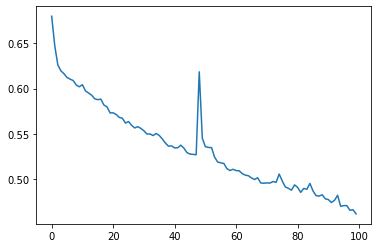

In [33]:
plt.plot(history.epoch, history.history.get('loss'))

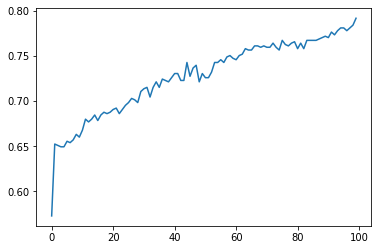

In [34]:
plt.plot(history.epoch, history.history.get('acc'))